In [1]:
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

In [3]:
input = pd.read_excel('input_G2.xlsx')
print(input)
evaluation = pd.read_excel('stiffness_G2.xlsx')
print(evaluation)

      0.419730  0.536310  0.034265  0.867833
0     0.565276  0.439426  0.033581  0.538838
1     0.515454  0.527717  0.013967  1.010256
2     0.481304  0.407117  0.029862  0.784468
3     0.447211  0.549859  0.012617  0.828161
4     0.469583  0.492468  0.010423  1.020316
...        ...       ...       ...       ...
9994  0.408795  0.477987  0.038399  0.559415
9995  0.521147  0.474584  0.037316  0.765663
9996  0.561610  0.469379  0.028298  0.739597
9997  0.480999  0.445957  0.028666  1.029609
9998  0.402400  0.542921  0.034567  0.989971

[9999 rows x 4 columns]
      4.109213
0     0.427889
1     0.247705
2     1.045692
3     0.142780
4     0.145238
...        ...
9994  2.314033
9995  1.571243
9996  0.479050
9997  2.762539
9998  8.384488

[9999 rows x 1 columns]


In [4]:
# split data (80% of  dataset into  training set and  other 20% into test data)
X1_train, X1_test, y1_train, y1_test = train_test_split(input, evaluation, test_size = 0.2,random_state=0, shuffle=False)  #480 training and 120 testing datasets
#print(X1_train)      #type= pandas.core.frame.DataFrame

In [5]:
# Feature scaling
scaler = StandardScaler()  

X1s_train = scaler.fit_transform(X1_train)  # numpy.ndarray
X1s_test = scaler.transform(X1_test)    # numpy.ndarray

C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


In [7]:
# MLP- Multilayer Perceptron
mlp = MLPRegressor(hidden_layer_sizes=(40,40,40), max_iter=1000, batch_size='auto',learning_rate_init=0.001, learning_rate='adaptive',solver='adam', activation='tanh')  
mlp.fit(X1s_train, y1_train.values.ravel())

MLPRegressor(activation='tanh', hidden_layer_sizes=(40, 40, 40),
             learning_rate='adaptive', max_iter=1000)

In [8]:
predictions1 = mlp.predict(X1s_test) 

In [9]:
# Evaluation of algorithm performance

r2=r2_score(y1_test, predictions1)
print(r2)

0.997452281116191


In [10]:
# TEST A RANDOM ARRAY
# l=0.5, h=0.5 , t=0.06 , theta=0.6 ; note that t is outside train range
import numpy as np
test_array= np.array([0.5, 0.5, 0.06, 0.6]).reshape(1, -1)
test_array=scaler.transform(test_array)

test_array=test_array
#test_array.shape

val_test= mlp.predict(test_array) 
val_test

array([4.48819223])

In [21]:
from SALib.sample import saltelli
from SALib.analyze import sobol


problem = {
    'num_vars': 4,
    'names': ['l','h','t','theta'],
    'bounds': [[-1,1]*4]
}

#If `calc_second_order` is False, the resulting matrix has ``N * (D + 2)`` rows, 
#where ``D`` is the number of parameters. If `calc_second_order` is `True`, the resulting matrix has ``N * (2D + 2)`` rows.
param_values = saltelli.sample(problem, 10000, calc_second_order = True)    

C:\Users\fhassani\AppData\Local\Temp\ipykernel_22532\369149270.py:13: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 10000, calc_second_order = True)
C:\Users\fhassani\AppData\Roaming\Python\Python39\site-packages\SALib\sample\saltelli.py:110: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (10000) is equal to `2^n`.
        
  warnings.warn(msg)


In [24]:
Y = np.zeros([param_values.shape[0]])
Y = mlp.predict(param_values)    

# Perform Sobol Analysis
Si = sobol.analyze(problem, Y)     


C:\Users\fhassani\AppData\Roaming\Python\Python39\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


C:\Users\fhassani\AppData\Roaming\Python\Python39\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


[             ST   ST_conf
l      0.158442  0.007330
h      0.004355  0.000232
t      0.706680  0.026737
theta  0.243225  0.010664,              S1   S1_conf
l      0.108809  0.010466
h      0.002871  0.001616
t      0.607394  0.021944
theta  0.173273  0.013825,                   S2   S2_conf
(l, h)     -0.000427  0.015998
(l, t)      0.035318  0.021144
(l, theta)  0.009004  0.019814
(h, t)      0.000697  0.003687
(h, theta) -0.000290  0.002988
(t, theta)  0.056566  0.032998]


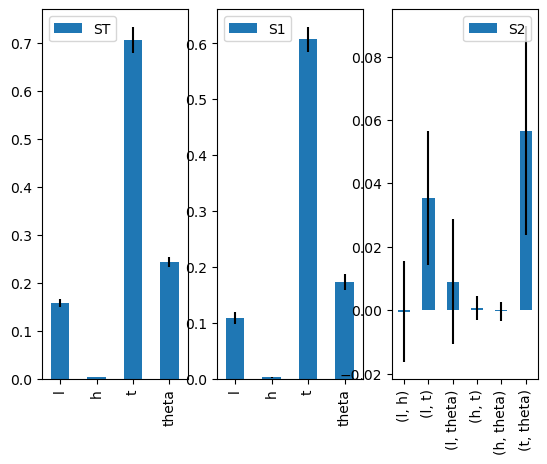

In [25]:
# Turn output to a Pandas DataFrame for further analysis
total_Si, first_Si, second_Si = Si.to_df()
Si.plot()
print(Si.to_df())